In [19]:
import pandas as pd
import requests
import re
import random
from random import sample
import json
import math
from utils import *
from sentence_classifier import SentenceClassifier
from tokenizer_class import TokenizerClass
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import csv


In [40]:

all_articles = pd.read_csv("all_protected_wiki_list.csv")
all_articles=list(all_articles.iloc[:,1])
articles=sample(all_articles,20)

In [26]:
file = open("all_protected_wiki_list.csv", "r")
all_articles = list(csv.reader(file, delimiter=","))
file.close()


articles=sample(all_articles,20)

In [41]:
# Loop over articles

text=''
for name in articles:
    print(name)
    raw=fetch_rawtext_from_wiki(name)
    text=text + raw
df=preprocess_classify_wiki_text(text)




Steinzeit
Deutsche Demokratische Republik
Ski Aggu
Elsa Grube-Deister
Archaeopteryx
Hauspferd
Zypern (Insel)
Elsa Grube-Deister
Archaeopteryx
Cro (Rapper)
Van Canto
Udo Landbauer
João Cancelo
Isco
Daniela Brodesser
Isco
Zypern (Insel)
Udo Landbauer
Bild (Zeitung)
Ohaguro


In [42]:
tokenizer=TokenizerClass()
claim_extract=SentenceClassifier(tokenizer_class=tokenizer)
claim_extract.preprocess_train_val(df)
claim_extract.train_model()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 32, 32)            327648    
                                                                 
 lstm_5 (LSTM)               (None, 64)                24832     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 352,545
Trainable params: 352,545
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 32, 32)            327648    
                                                                 
 lstm_5 (LSTM)            

In [43]:
annotated=pd.read_csv('FullAnnotated1.csv',sep=';',dtype={'sentence':'str'})
annotated=annotated[annotated['to_exclude']==0]
annotated['prediction']=claim_extract.predict_target(annotated['sentence'])

4/4 [==============================] - 0s 3ms/step


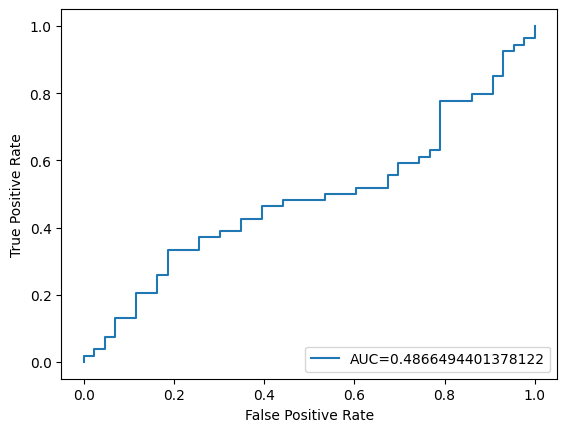

In [44]:
fpr, tpr, _ = metrics.roc_curve(annotated['is_claim'],  annotated['prediction'])
auc = metrics.roc_auc_score(annotated['is_claim'],  annotated['prediction'])
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [9]:
raise KeyboardInterrupt("Until autorun till here!")

KeyboardInterrupt: Until autorun till here!

In [ ]:
print(annotated)

     Unnamed: 0                                           sentence  is_claim  \
0             0  Ärger über Gasmasken-Eklat Samstag, 1 Juli, 12...         1   
1             1  Dabei hatte die Projektleitung eigentlich ein ...         0   
2             2  Trotz der beiden Bike-Lanes ist der Verkehr au...         1   
3             3  Interessant ist, dass es der Civey-Umfrage zuf...         1   
4             4  Die Salzburger Festspiele aber haben sich zumi...         0   
..          ...                                                ...       ...   
100         100  Auf manchen Friedhöfen gebe es eine überdachte...         0   
101         101  Sie schlagen mit ihren Gummiknüppeln auf die M...         1   
102         102  Anfang Mai wähnte sich die nationalpopulistisc...         1   
104         104  Der Inhalt der Mails, die dem britischen Morni...         1   
105         105                           ZEIT ONLINE: Inwiefern\?         0   

     to_exclude      prediction  
0    

4/4 [==============================] - 0s 3ms/step


In [ ]:
fang_text=fetch_from_fangcovid_local(5,10)
#fang_pre=preprocess_text(fang_text)
df_fang=pd.DataFrame()
df_fang["text"]=split_text(fang_text)
df_fang["prediction"]=claim_extract.predict_target(df_fang["text"])

# df_fang["tokenized"]=tokenizer.texts_to_sequences(df_fang["sentence"])
# fang_padded = pad_sequences(df_fang["tokenized"], maxlen=32, padding="post", truncating="post")
# df_fang["predictions"]=model.predict(fang_padded)

In [ ]:
articles = articles+articles_strict

In [12]:
articles_strict=['Wiesentalbrücke','Mammut (Gattung)','Riemannsche Vermutung','Reichstag zu Augsburg','Deutsch-Französischer Krieg','Kantonsspital Winterthur','Femizid','Nicht-zufällige Segregation von Chromosomen','Beryllium','Massenaussterben','Covid-19','Pandemie','Sex','Homosexualität','OG Keemo','Conchita Wurst','Hochschule für Medien, Kommunikation und Wirtschaft','Europäische Union','Biographie','Donald Trump','Angstzustände','Doktortitel','BAHN-BKK']
articles=articles+articles_strict

In [11]:
articles=["Maschinelles Lernen", "Medizin","Wissenschaft","Krankheit","Prävention","Diagnose","Politik","COVID-19","COVID-19-Pandemie","Epidemie","Mykose","Sexuell übertragbare Erkrankung","Infektionskrankheit","Bundestag","Bundesrat","Zeitung","Rundfunk","Verlag","Politisches System der Bundesrepublik Deutschland","Politisches System","Massenmedien","Medienwissenschaft","Publikation"]


In [ ]:
# Loop over articles

text=''
for name in articles:
    print(name)
    raw=fetch_rawtext_from_wiki(name)
    text=text + raw
df=preprocess_classify_wiki_text(text)



Wiesentalbrücke
Mammut (Gattung)
Riemannsche Vermutung
Reichstag zu Augsburg
Deutsch-Französischer Krieg
Kantonsspital Winterthur
Femizid
Nicht-zufällige Segregation von Chromosomen
Beryllium
Massenaussterben
Covid-19
Pandemie
Sex
Homosexualität
OG Keemo
Conchita Wurst
Hochschule für Medien, Kommunikation und Wirtschaft
Europäische Union
Biographie
Donald Trump
Angstzustände
Doktortitel
BAHN-BKK


In [ ]:
#Pipeline, if "claims" is free text of all labeled claims 

split_claims=split_text(claims)
df_claim =pd.DataFrame()
df_claim["text"]= split_claims
df_claim=df_claim.assign(target=True)
df=df.loc[df["target"]==False]
df=pd.concat([df,df_claim])

In [ ]:
## Re-Balanced Class Sets
df_majority = df[df.target==0]
df_minority = df[df.target==1]
 
# Downsample majority class
df_majority_downsampled = random.sample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2451,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df = pd.concat([df_majority_downsampled, df_minority])

NameError: name 'resample' is not defined

In [ ]:
fang_text=fetch_from_fangcovid_local(5,10)
#fang_pre=preprocess_text(fang_text)
df_fang=pd.DataFrame()
df_fang["sentence"]=split_text(fang_text)
df_fang["tokenized"]=tokenizer.texts_to_sequences(df_fang["sentence"])
fang_padded = pad_sequences(df_fang["tokenized"], maxlen=32, padding="post", truncating="post")
df_fang["predictions"]=model.predict(fang_padded)

In [ ]:
# df_fang["predictions"]=model.predict(fang_padded)

print(df_fang.sort_values("predictions"))
os.chdir("/Users/jannis/Desktop/fang-covid-main")
df_fang=df_fang[['predictions','sentence']]
df_fang.to_csv("results7.csv" )

In [ ]:
label_count={}
claims=" "
os.chdir("/Users/jannis/Desktop/x-fact-main/data/x-fact")
with open("train.all.tsv", 'r') as fp:
    for line in fp:
        arr = line.strip().split('\t')
        lang = arr[1].lower()
        site = arr[2].lower()
        domain = (lang, site)
        

        if domain not in label_count:
                label_count[domain] = {}
        if arr[0] == 'de':
            claims = claims + arr[3]
            print(arr[3])
            

        label = arr[-1].lower()

        if label not in label_count[domain]:
            label_count[domain][label] = 0
        label_count[domain][label] +=1



# new_map = {}
# for key in label_count.keys():
#     new_map[key] = {}
#     counts = label_count[key]

#     total = 0
#     for k, v in counts.items():
#         total += v

#     for k,v in counts.items():
#         new_map[key][k] = float(v)/total


# print(new_map)

# total = 0
# count = 0
# for key in new_map.keys():
#     counts = new_map[key]
#     take = True
#     for k, v in counts.items():
#         if v > 0.7:
#             take = False

#     if take:
#         print(key)
#         count +=1
#         for k, v in label_count[key].items():
#             total += v

# print(total)
# print(count)


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/justusmattern/fang-covid/main/articles/20000.json")


In [ ]:
from datasets import load_dataset
dataset = load_dataset("mlsum", "de")
df_json=pd.read_json(dataset["train"])
claim=" "
i=0
while i<10000:
    claim=claim+dataset["train"]["summary"][randint(0,220000)]
    i=+1
array=dataset["train"]["summary"][:10000]
s=" ".join(array)


In [ ]:
nlp=German()
doc=nlp(text)
nlp.add_pipe('sentencizer')
sents=list(doc.sents)
print(sents)

In [ ]:
def tokenize_text(text):
    nlp = spacy.load("de_core_news_md")
    doc = nlp(sentences[0])
    print(doc.text)
    for token in doc:
        print(token.text, token.pos_, token.dep_)